In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

# Loading the data file
mat = loadmat("cancerWTrain.mat")

Xtrain = mat["cancerTrainX"] # matrix of 30 rows and 400 features
print("Xtrain shape",Xtrain.shape)
Xtrain = np.transpose(Xtrain)
n=len(Xtrain)
print("Xtrain shape after reshape",Xtrain.shape)

ytrain = mat["cancerTrainY"] # matrix of 1 rows and 400 features
print("ytrain shape",ytrain.shape)
ytrain = np.ravel(ytrain)
#ytrain = ytrain.reshape(n,1)
print("ytrain shape after reshape",ytrain.shape)

print("Xtrain")
print(Xtrain[:5,:10])
print("ytrain")
print(ytrain[:10])

Xtrain shape (30, 400)
Xtrain shape after reshape (400, 30)
ytrain shape (1, 400)
ytrain shape after reshape (400,)
Xtrain
[[1.453e+01 1.398e+01 9.386e+01 6.442e+02 1.099e-01 9.242e-02 6.895e-02
  6.495e-02 1.650e-01 6.121e-02]
 [1.136e+01 1.757e+01 7.249e+01 3.998e+02 8.858e-02 5.313e-02 2.783e-02
  2.100e-02 1.601e-01 5.913e-02]
 [1.768e+01 2.074e+01 1.174e+02 9.637e+02 1.115e-01 1.665e-01 1.855e-01
  1.054e-01 1.971e-01 6.166e-02]
 [1.902e+01 2.459e+01 1.220e+02 1.076e+03 9.029e-02 1.206e-01 1.468e-01
  8.271e-02 1.953e-01 5.629e-02]
 [2.048e+01 2.146e+01 1.325e+02 1.306e+03 8.355e-02 8.348e-02 9.042e-02
  6.022e-02 1.467e-01 5.177e-02]]
ytrain
[0 0 1 1 1 1 0 1 0 0]


In [2]:
#If the difference between features values is very high, Standard scaling is required, otherwise not required. (preprocessing)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalize = scaler.fit_transform(Xtrain)
print(X_normalize[:5,:5])

[[ 0.11460184 -1.24395724  0.07895931 -0.03005724  0.96753454]
 [-0.80287855 -0.39483967 -0.81669104 -0.72915924 -0.52140722]
 [ 1.02629371  0.35493824  1.06555778  0.88386702  1.07927501]
 [ 1.41412453  1.26555179  1.25835102  1.20509924 -0.40198459]
 [ 1.83668648  0.5252348   1.69842255  1.86301029 -0.87269132]]


In [3]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2) #n_components, it means the whole features are decomposed into 2 features
pca.fit(X_normalize)
Xtrain_pca=pca.transform(X_normalize)
print(X_normalize.shape)
print(Xtrain.shape)
print(Xtrain_pca.shape)
print(ytrain.shape)
print(Xtrain_pca[:5])
print(ytrain[:5])

(400, 30)
(400, 30)
(400, 2)
(400,)
[[-1.07976537 -0.42205276]
 [-2.85194933 -0.37931792]
 [ 4.1668597  -0.38664797]
 [ 3.68937737 -2.15549683]
 [ 2.69525946 -3.94834452]]
[0 0 1 1 1]


<IPython.core.display.Javascript object>


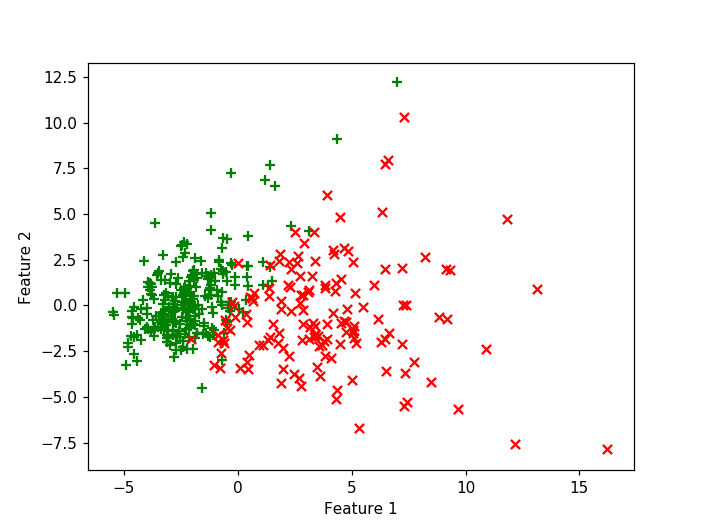

In [4]:
import matplotlib.pylab as plt
X0=Xtrain_pca[ytrain==0]
X1=Xtrain_pca[ytrain==1]

fig, ax = plt.subplots()
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.scatter(X0[:,0], X0[:,1], color="green", marker="+")
ax.scatter(X1[:,0], X1[:,1], color="red", marker="x")
fig.show()

In [5]:
from sklearn.decomposition import PCA
pca =PCA(n_components=20) #n_components, it means the whole features are decomposed into 2 features
pca.fit(X_normalize)
Xtrain_pca=pca.transform(X_normalize)
print(X_normalize.shape)
print(Xtrain.shape)
print(Xtrain_pca.shape)
print(ytrain.shape)
print(Xtrain_pca[:5])
print(ytrain[:5])

(400, 30)
(400, 30)
(400, 20)
(400,)
[[-1.07976537e+00 -4.22052760e-01 -5.30308537e-01  2.14491203e+00
  -1.86681166e-01 -5.36460220e-01 -4.18427251e-01 -4.34914178e-01
  -4.89736235e-01 -1.36201229e-01  2.69138420e-01 -8.55191996e-01
  -2.87459215e-01  1.95325844e-02  4.45492997e-01  2.46015783e-03
  -7.82937460e-02  9.40279105e-02  4.75165211e-02 -4.27033464e-02]
 [-2.85194933e+00 -3.79317915e-01 -9.64478761e-01 -1.67848222e+00
  -5.32660367e-01 -4.40116779e-01  4.00235567e-02 -2.95170865e-01
   6.89674069e-01 -5.20282243e-01  3.78937409e-01  6.53013961e-01
  -5.67588386e-01  1.62481365e-01 -2.17500305e-02  7.32754948e-01
   4.34148318e-01 -3.00949017e-01  2.05278856e-03 -6.68736639e-01]
 [ 4.16685970e+00 -3.86647968e-01  1.30873361e+00  6.87335175e-01
  -4.17940621e-02 -1.07401502e+00 -3.48430780e-01 -3.43626034e-01
   6.41824298e-03  2.31416772e-01 -9.02294918e-01 -3.92515514e-02
   5.65873002e-01  5.82573108e-01  9.23266834e-02  3.35635945e-01
   4.80927744e-03  8.22077313e-02 -2.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain_pca, ytrain, test_size=1/4, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
ypred = classifier.predict(Xtest)
print(ypred)

[0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1]


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.94

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[63  0]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        63
           1       1.00      0.84      0.91        37

    accuracy                           0.94       100
   macro avg       0.96      0.92      0.93       100
weighted avg       0.95      0.94      0.94       100



In [11]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
n_neighbors = list(range(1,30))
params = {'n_neighbors':n_neighbors, 'weights':['uniform', 'distance'],}

#Making models with hyper parameters sets
model = GridSearchCV(classifier, param_grid=params, cv=4)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)

#Prediction
ypred=model.predict(Xtest)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(ypred,ytest))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(ypred,ytest))

Best Hyper Parameters:
 {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.94
Confusion Metrix:
 [[62  5]
 [ 1 32]]


In [12]:
# train your model using all data and the best known parameters
knn_best = KNeighborsClassifier(n_neighbors=3, weights='uniform')
print(Xtrain_pca.shape)
print(ytrain.shape)
# Can not use here Xtrain_pca beacuse of different shape
knn_best.fit(Xtrain,ytrain)

(400, 20)
(300,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
# Predict the values of given test data after finding best knn through crossvalidation
Xtest = mat["cancerTestX"]
print("Xtest shape",Xtest.shape)
Xtest = np.transpose(Xtest)
print("Xtest shape after reshape",Xtest.shape)
print(Xtest[:5,:5])

Xtest shape (30, 169)
Xtest shape after reshape (169, 30)
[[1.364e+01 1.560e+01 8.738e+01 5.753e+02 9.423e-02]
 [1.051e+01 2.019e+01 6.864e+01 3.342e+02 1.122e-01]
 [2.044e+01 2.178e+01 1.338e+02 1.293e+03 9.150e-02]
 [1.130e+01 1.819e+01 7.393e+01 3.894e+02 9.592e-02]
 [1.185e+01 1.746e+01 7.554e+01 4.327e+02 8.372e-02]]


In [14]:
Xtest_normalize = scaler.fit_transform(Xtest)
print(Xtest_normalize[:5,:5])

[[-0.12835569 -0.85496396 -0.1811645  -0.2245659  -0.21499179]
 [-0.98074611  0.17538403 -0.92366372 -0.90119623  1.12917386]
 [ 1.72348294  0.53230196  1.65804648  1.78960908 -0.41919726]
 [-0.76560604 -0.27356934 -0.71406816 -0.74628128 -0.08857888]
 [-0.61582497 -0.43743732 -0.6502782  -0.62476285 -1.00114543]]


In [15]:
from sklearn.decomposition import PCA
pca =PCA(n_components=20) #n_components means the whole features are decomposed into 2 features
pca.fit(Xtest_normalize)
Xtest_pca=pca.transform(Xtest_normalize)
print(Xtest_normalize.shape)
print(Xtest_pca.shape)

(169, 30)
(169, 20)


In [16]:
#Prediction
cancerTesty=knn_best.predict(Xtest_pca)
print(cancerTesty)

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [17]:
ytrain = mat["cancerTrainY"] # matrix of 1 rows and 400 features
print("ytrain shape",ytrain.shape)
ytrain = np.ravel(ytrain)
#ytrain = ytrain.reshape(n,1)
print("ytrain shape after reshape",ytrain.shape)

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
classification_model1 = SVC(kernel='linear', C=1, gamma='auto')
classification_model1.fit(Xtrain_pca, ytrain)

ytrain shape (1, 400)
ytrain shape after reshape (400,)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# Using cross-validation instead of train_test_split because we have less data
cv_scores = cross_val_score(classification_model1, Xtrain_pca, ytrain, cv=5, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.95   0.9875 0.9875 0.95   0.9875]
cv_scores mean:0.9724999999999999


In [19]:
from sklearn.svm import SVC
classification_model2 = SVC(kernel='poly', degree=5, gamma='auto')
classification_model2.fit(Xtrain_pca, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Using cross-validation instead of train_test_split because we have less data
cv_scores = cross_val_score(classification_model2, Xtrain_pca, ytrain, cv=5, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.8375 0.875  0.8875 0.8625 0.9   ]
cv_scores mean:0.8724999999999999


In [21]:
from sklearn.svm import SVC
classification_model3 = SVC(kernel='rbf', gamma='auto')
classification_model3.fit(Xtrain_pca, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# Using cross-validation instead of train_test_split because we have less data
cv_scores = cross_val_score(classification_model3, Xtrain_pca, ytrain, cv=5, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.9375 0.9875 0.9875 0.975  0.975 ]
cv_scores mean:0.9724999999999999


In [23]:
# search for an optimal value of K for KNN
from sklearn.model_selection import GridSearchCV
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 8], 'gamma': ['auto', 'scale'], 'kernel': ['linear','poly','rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, cv = 5) 
  
# fitting the model for grid search 
grid.fit(Xtrain_pca, ytrain) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 8],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
#The best hyper parameters set
print("Best Scores:\n",grid.best_score_)
print("Best Hyper Parameters:\n",grid.best_params_)

Best Scores:
 0.9775
Best Hyper Parameters:
 {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}


In [25]:
from sklearn.svm import SVC
best = SVC(kernel='linear', gamma='auto', C=10, degree=3)
best.fit(Xtrain_pca, ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
# Using cross-validation instead of train_test_split because we have less data
cv_scores = cross_val_score(best, Xtrain_pca, ytrain, cv=5, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.95   1.     0.9875 0.9625 0.9875]
cv_scores mean:0.9775


In [27]:
# Predict the values of given test data after finding best knn through crossvalidation
Xtest = mat["cancerTestX"]
print("Xtest shape",Xtest.shape)
Xtest = np.transpose(Xtest)
print("Xtest shape after reshape",Xtest.shape)
print(Xtest[:5,:5])

Xtest shape (30, 169)
Xtest shape after reshape (169, 30)
[[1.364e+01 1.560e+01 8.738e+01 5.753e+02 9.423e-02]
 [1.051e+01 2.019e+01 6.864e+01 3.342e+02 1.122e-01]
 [2.044e+01 2.178e+01 1.338e+02 1.293e+03 9.150e-02]
 [1.130e+01 1.819e+01 7.393e+01 3.894e+02 9.592e-02]
 [1.185e+01 1.746e+01 7.554e+01 4.327e+02 8.372e-02]]


In [28]:
Xtest_normalize = scaler.fit_transform(Xtest)
print(Xtest_normalize[:5,:5])

[[-0.12835569 -0.85496396 -0.1811645  -0.2245659  -0.21499179]
 [-0.98074611  0.17538403 -0.92366372 -0.90119623  1.12917386]
 [ 1.72348294  0.53230196  1.65804648  1.78960908 -0.41919726]
 [-0.76560604 -0.27356934 -0.71406816 -0.74628128 -0.08857888]
 [-0.61582497 -0.43743732 -0.6502782  -0.62476285 -1.00114543]]


In [29]:
from sklearn.decomposition import PCA
pca =PCA(n_components=20) #n_components means the whole features are decomposed into 2 features
pca.fit(Xtest_normalize)
Xtest_pca=pca.transform(Xtest_normalize)
print(Xtest_normalize.shape)

(169, 30)


In [30]:
#Prediction
print("Prediction using SVM:")
cancerTesty=best.predict(Xtest_pca)
print(cancerTesty)

Prediction using SVM:
[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [31]:
# Final output
Final_Output = best.predict(Xtest_pca)
print(Final_Output)


[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
